## Import and Data Wrangling

In [9]:
import pandas as pd
import numpy as np
import re

used_car = pd.read_csv("new_used_car2.csv")

In [10]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13601 entries, 0 to 13600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            13601 non-null  int64 
 1   vehicle_id            13601 non-null  object
 2   vehicle_title         13601 non-null  object
 3   vehicle_make          13601 non-null  object
 4   vehicle_model         13601 non-null  object
 5   vehicle_body_type     13584 non-null  object
 6   vehicle_year          13601 non-null  int64 
 7   vehicle_mileage       13601 non-null  int64 
 8   vehicle_transmission  13601 non-null  object
 9   vehicle_variant       12237 non-null  object
 10  vehicle_type          13601 non-null  object
 11  vehicle_price         13601 non-null  object
 12  vehicle_location      13601 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.3+ MB


In [11]:
# drop `Unnamed: 0` column
used_car.drop('Unnamed: 0', axis=1, inplace=True)

# correcting column name
used_car.rename(columns={'vehicle_location': 'vehicle_link'}, inplace=True)

# Correcting price column
pattern = "[0-9]+"
p = re.compile(pattern)

used_car['vehicle_price_new'] = int(0)
for i in range(len(used_car)):
    draft_price = used_car.vehicle_price[i][3:].replace('.','')
    used_car['vehicle_price_new'][i]= int(p.findall(draft_price)[0])
    
used_car.drop('vehicle_price', axis=1, inplace=True)
used_car.rename(columns={'vehicle_price_new': 'vehicle_price'}, inplace=True)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
used_car.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
vehicle_year,13601.0,2.015918e+03,5.278001e+00,1963.0,2014.0,2017.0,2019.0,2.023000e+03
vehicle_mileage,13601.0,6.029567e+04,4.926512e+04,1.0,22500.0,47500.0,82500.0,9.999990e+05
vehicle_price,13601.0,4.294358e+08,6.342279e+08,450000.0,150000000.0,230000000.0,460000000.0,1.575000e+10


In [13]:
used_car.describe(exclude='number').T

,count,unique,top,freq
vehicle_id,13601,13592,listing_13111736,2
vehicle_title,13601,9078,2018 Mitsubishi Xpander ULTIMATE Wagon,49
vehicle_make,13601,53,Toyota,3784
vehicle_model,13601,534,Kijang Innova,620
vehicle_body_type,13584,25,SUV,3768
vehicle_transmission,13601,2,Automatic,11134
vehicle_variant,12237,759,G,1392
vehicle_type,13601,1,car,13601
vehicle_link,13601,13592,https://www.carmudi.co.id/dijual/suzuki-ertiga...,2


In [14]:
used_car.sample(2)

,vehicle_id,vehicle_title,vehicle_make,vehicle_model,vehicle_body_type,vehicle_year,vehicle_mileage,vehicle_transmission,vehicle_variant,vehicle_type,vehicle_link,vehicle_price
873,listing_12938288,2015 Toyota Corolla Altis 1.8 V Sedan,Toyota,Corolla Altis,Sedan,2015,142500,Automatic,V,car,https://www.carmudi.co.id/dijual/toyota-coroll...,189000000
7525,listing_12626097,2020 Toyota Corolla Altis 1.8 V Sedan KM 9Ribu...,Toyota,Corolla Altis,Sedan,2020,7500,Automatic,V,car,https://www.carmudi.co.id/dijual/toyota-coroll...,355000000


In [15]:
used_car.vehicle_make.value_counts()

Toyota              3784
Honda               2036
Mercedes-Benz       1441
BMW                 1183
Daihatsu             906
Mitsubishi           761
Suzuki               723
Nissan               579
Mazda                372
Lexus                224
Wuling               205
Hyundai              185
Land Rover           147
MINI                 129
Porsche              112
Chevrolet            111
Volkswagen           103
Jeep                  97
Ford                  77
Audi                  66
Isuzu                 60
KIA                   59
Peugeot               27
Jaguar                27
Ferrari               24
Datsun                24
Hummer                19
Tesla                 12
Bentley               11
Subaru                10
Renault               10
smart                 10
Lamborghini            7
DFSK                   7
Aston Martin           6
Rolls-Royce            6
Dodge                  6
Volvo                  5
Maserati               5
McLaren                5


#### Findings:
1. To make data more robust, Minimal and maximal values for car will be at least 20.000.000 and 10.000.000.000 rupiah, values out of the range will be dropped.
2. There are some duplicate values, duplicates will be drop.
3. Car with manufacturer data less than 50 will be drop, because lack of dataset will make poor model performance.

In [16]:
# dropping car manufacturer with less than 50 data
manufacturer_more50 = list(used_car.vehicle_make.value_counts()[used_car.vehicle_make.value_counts()>=50].index)

used_car = used_car[used_car.vehicle_make.isin(manufacturer_more50)]

In [17]:
# filtering with price
used_car = used_car[(used_car.vehicle_price<10000000000) & (used_car.vehicle_price>20000000)]

In [18]:
# dropping duplicates
used_car.drop_duplicates(inplace=True)

In [19]:
# resetting index
used_car.reset_index(drop=True, inplace=True)

In [20]:
# Fill null values in vehicle body type and correcting some values
car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'Yaris')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Hatchback'
    
car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'X-Trail')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'SUV'
    
car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'Colt L300')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Pick-up'

car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'Lancer')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Sedan'

car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'Land Cruiser')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'SUV'

car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'A6')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Sedan'

car_list = list(used_car[(used_car.vehicle_body_type.isnull()) & (used_car.vehicle_model == 'Odyssey')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'MPV'
    
car_list = list(used_car[(used_car.vehicle_body_type == 'Others') & (used_car.vehicle_make == 'Mercedes-Benz')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Coupe'
    
car_list = list(used_car[(used_car.vehicle_body_type == 'Convertibles Roadsters')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Convertible'

car_list = list(used_car[(used_car.vehicle_body_type == 'Pick Up')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Pick-up'

car_list = list(used_car[(used_car.vehicle_body_type == 'SUV Offroad 4WD')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'SUV'

car_list = list(used_car[(used_car.vehicle_body_type == 'Classic Cars')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Hatchback'

car_list = list(used_car[(used_car.vehicle_body_type == 'Double Cabin')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Trucks'

car_list = list(used_car[(used_car.vehicle_body_type == 'Gran Coupe')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'Coupe'

car_list = list(used_car[(used_car.vehicle_body_type == 'MPV Minivans')].index)
for i in car_list:
    used_car['vehicle_body_type'].iloc[i] = 'MPV'

C:\Users\Acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Some EDA

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Price

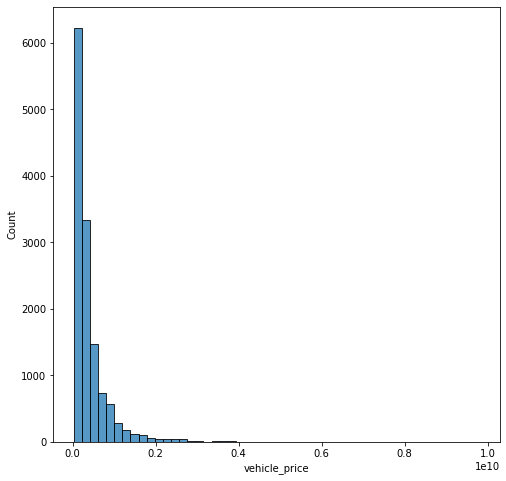

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(data=used_car, x='vehicle_price', bins=50)

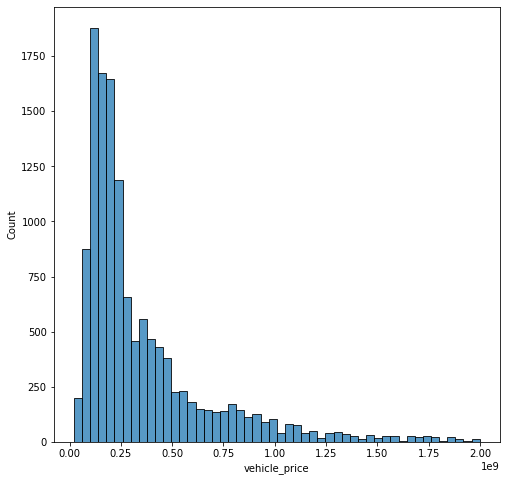

In [23]:
# with filter of price under 2 billion rupiah
plt.figure(figsize=(8,8))
sns.histplot(data=used_car[used_car.vehicle_price<2000000000], x='vehicle_price', bins=50)

### Mileage

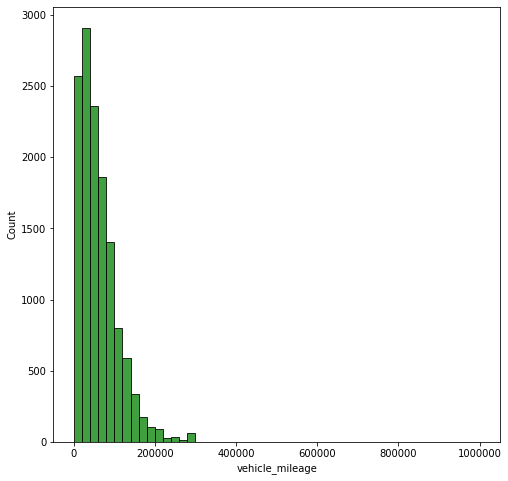

In [24]:
plt.figure(figsize=(8,8))
sns.histplot(data=used_car, x='vehicle_mileage', bins=50, color='green')

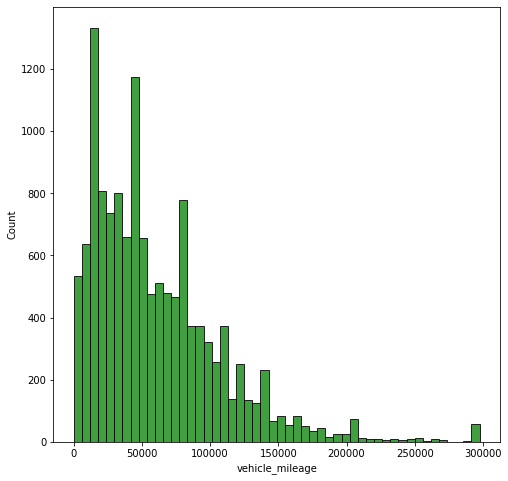

In [25]:
# with filter of mileage under 300.000
plt.figure(figsize=(8,8))
sns.histplot(data=used_car[used_car.vehicle_mileage<300000], x='vehicle_mileage', bins=50, color='green')

### Boxplot

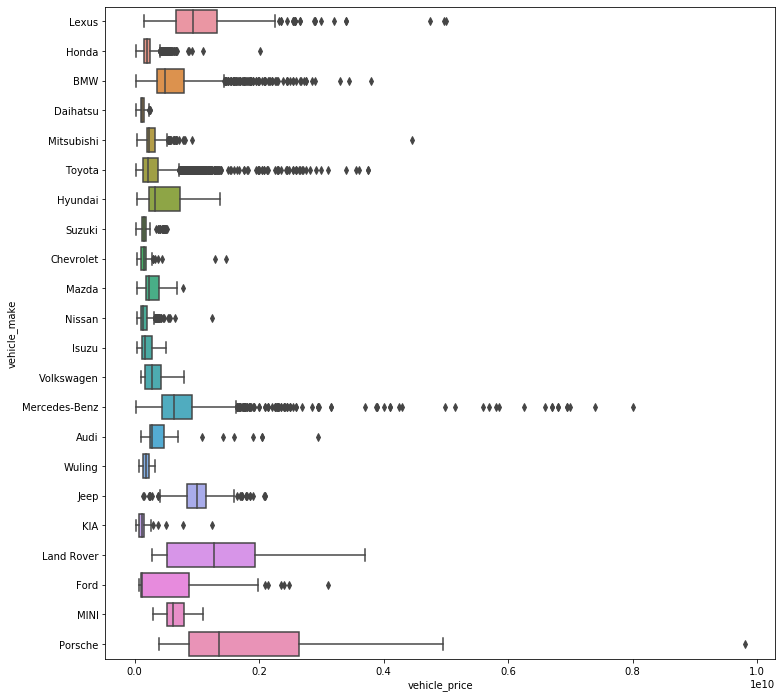

In [26]:
plt.figure(figsize=(12,12))
sns.boxplot(data=used_car, y='vehicle_make', x='vehicle_price')

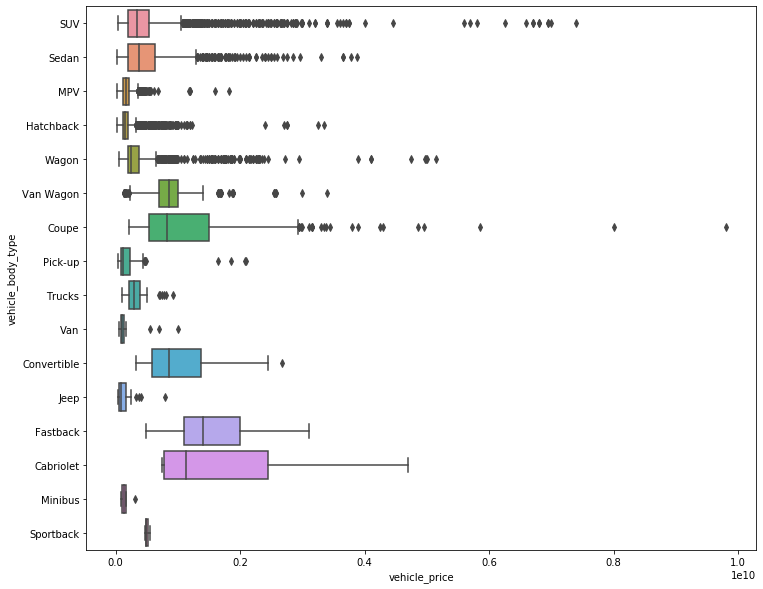

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(data=used_car, y='vehicle_body_type', x='vehicle_price')

## Modeling

In [28]:
# drop unused columns
unused_cols= ['vehicle_id', 'vehicle_title', 'vehicle_variant', 'vehicle_link', 'vehicle_type']

used_car_for_model = used_car.drop(unused_cols, axis=1)

In [29]:
used_car_for_model.sample(4)

,vehicle_make,vehicle_model,vehicle_body_type,vehicle_year,vehicle_mileage,vehicle_transmission,vehicle_price
9951,Chevrolet,Captiva,SUV,2016,90000,Automatic,275000000
2284,Toyota,Kijang,MPV,1988,202500,Manual,69000000
9778,Toyota,Yaris,Hatchback,2021,27500,Automatic,229000000
8431,Honda,Mobilio,MPV,2014,81000,Automatic,120000000


In [164]:
# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [172]:
used_car_for_model.describe(exclude="number").T

,count,unique,top,freq
vehicle_make,13345,22,Toyota,3779
vehicle_model,13345,448,Kijang Innova,619
vehicle_body_type,13345,16,SUV,3730
vehicle_transmission,13345,2,Automatic,10926


In [173]:
# columns to transform and target
onehot_cols = ['vehicle_transmission', 'vehicle_body_type', 'vehicle_make']
binary_cols = ['vehicle_model']
scale_cols = ['vehicle_mileage', 'vehicle_year']
target_col = ['vehicle_price']

In [174]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', drop='first'), onehot_cols),
    ('binary', BinaryEncoder(), binary_cols),
    ('scaler', RobustScaler(), scale_cols)
], remainder = 'passthrough')

In [175]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [177]:
# Memisahkan data independen variabel dengan target
X = used_car_for_model.drop(target_col, axis=1)
y = used_car_for_model[target_col]

In [178]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

In [181]:
# Define algoritma yang digunakan
lr = LinearRegression()
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_rf, log_xgb]

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAPE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-0.30024434 -0.28586536 -0.28515268 -0.2644686  -0.28457231] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.14187276 -0.1394878  -0.13517807 -0.1333787  -0.12904991] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-0.13640124 -0.13472156 -0.13096746 -0.12895857 -0.12030661] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
           

In [182]:
# Evaluasi hasil dari 3 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression','RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_MAPE,Std_MAPE
0,Linear Regression,-0.284061,0.011406
1,RandomForest Regressor,-0.135793,0.004523
2,XGBoost Regressor,-0.130271,0.005637


In [183]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

y_pred_benchmark = {}
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred_benchmark[i] = model.predict(X_test)
    score_mape.append(mean_absolute_percentage_error(y_test,  y_pred_benchmark[i]))
    score_r2.append(r2_score(y_test,  y_pred_benchmark[i]))

score_before_tuning = pd.DataFrame({'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


,MAPE,R2
XGB,0.166771,0.876151
RandomForest,0.141979,0.875617


In [184]:
# XGBOOST

# Maximum depth of a tree
max_depth = list(np.arange(2, 30))

# Step size shrinkage used in update to prevents overfitting
learning_rate = list(np.arange(1, 100)/100)

# Number of gradient boosted trees
n_estimators = list(np.arange(100, 201))

# Subsample ratio of the training instances
subsample = list(np.arange(1, 10)/10)

# Subsample ratio of columns for each level
colsample_bylevel= list(np.arange(1, 10)/10)

# L1 regularization term on weights
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__colsample_bylevel': colsample_bylevel,
    'model__reg_alpha': reg_alpha
}

In [187]:
# Define model for hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Pipeline for algorithm chain
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = None,
 #   refit = 'neg_mean_absolute_error',
    random_state = 1  
)

In [188]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['vehicle_transmission',
                                                                                'vehicle_body_type',
                                                                                'vehicle_make']),
                                                                              ('binary',
                                                                      

In [189]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -0.14229663189593206
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 10.0, 'model__n_estimators': 194, 'model__max_depth': 10, 'model__learning_rate': 0.17, 'model__colsample_bylevel': 0.6}


In [190]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'MAPE': mape_xgb_tuning, 'r2': r2_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,MAPE,r2
XGB,0.127458,0.876598


In [191]:
# save the model
import pickle
file_name = 'indonesia_used_car_v1.pkl'

pickle.dump(xgb_tuning, open(file_name, 'wb'))

In [192]:
# save data for model
used_car_for_model.to_csv("used_car_for_model.csv", index=False)

In [193]:
used_car_for_model.columns

Index(['vehicle_make', 'vehicle_model', 'vehicle_body_type', 'vehicle_year',
       'vehicle_mileage', 'vehicle_transmission', 'vehicle_price'],
      dtype='object')

In [32]:
used_car_for_model[used_car_for_model.vehicle_model=='Kijang Innova'].describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_year,619.0,2.015977e+03,4.115580e+00,2004.0,2014.0,2017.0,2019.0,2022.0
vehicle_mileage,619.0,8.529193e+04,5.058226e+04,138.0,51750.0,77500.0,112500.0,297500.0
vehicle_price,619.0,2.560996e+08,8.550689e+07,79000000.0,185000000.0,258000000.0,315000000.0,465000000.0
